In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os.path
path = os.getcwd()
parent_folder, current_folder = os.path.split(path)
parent_folder

'/Users/jamoth/DSR/DataScienceJobs'

In [3]:
df = pd.read_csv(parent_folder+'/data/indeed_us_all.csv', sep='\t')

In [4]:
df

,company,job_title,salary,location,date,full_description,url,extraction_date,salary_low,salary_high,job_type,industry,education,career
0,Bank of America,Data Scientist,Nothing_found,"Addison, TX 75001",Just posted,['Job Description:\nThis position will be resp...,https://www.indeed.com/rc/clk?jk=b4d0cb19574cc...,2019-11-05,Nothing_found,NaN,Not available,Not available,Not available,Not available
1,DITAT,SSRS Developer,Nothing_found,"St. Louis, MO",Today,"['Principal Responsibilities:\nDesign, develop...",https://www.indeed.com/rc/clk?jk=f93c5a869c1ca...,2019-11-05,Nothing_found,NaN,Not available,Not available,Not available,Not available
2,Glover Park Group,"Associate, Data Science & Analytics",Nothing_found,United States,Today,"['The Glover Park Group, a leading strategic c...",https://www.indeed.com/rc/clk?jk=5ff550c3f89ed...,2019-11-05,Nothing_found,NaN,Not available,Not available,Not available,Not available
3,Shamrock Foods,Data Analytics,Nothing_found,"Phoenix, AZ 85018 (Camelback East area)",Today,['Requisition ID\n2019-7935\nLocation : Addres...,https://www.indeed.com/rc/clk?jk=dd4bf083790a0...,2019-11-05,Nothing_found,NaN,Not available,Not available,Not available,Not available
4,TRISTAR,Data Administrator,Nothing_found,Indiana,Today,"['Company: TRISTAR, Inc.\nApply for position a...",https://www.indeed.com/rc/clk?jk=fb67437e00bc1...,2019-11-05,Nothing_found,NaN,Not available,Not available,Not available,Not available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Golden 1 Credit Union,Data Warehouse-DBA,Nothing_found,"Sacramento, CA",5 days ago,"[""GENERAL DESCRIPTION:\nThe Data Warehouse DBA...",https://www.indeed.com/rc/clk?jk=645aa03c85981...,2019-11-05,Nothing_found,NaN,Not available,Not available,Not available,Not available
996,TMP WORLDWIDE,Data Scientist,Nothing_found,"McLean, VA",3 days ago,"[""Data Science is the heart and core of our co...",https://www.indeed.com/rc/clk?jk=05421b7c3df30...,2019-11-05,Nothing_found,NaN,Not available,Not available,Not available,Not available
997,Hawaii Medical Service Association,Data Governance Analyst I,Nothing_found,"Honolulu, HI 96814",3 days ago,"[""Job Summary\nWorks independently with intern...",https://www.indeed.com/rc/clk?jk=4dbc4a733f937...,2019-11-05,Nothing_found,NaN,Not available,Not available,Not available,Not available
998,AETNA,Data Scientist (All Levels),Nothing_found,"New York, NY 10016 (Gramercy area)",Today,"[""Description:\nParticipates in the developmen...",https://www.indeed.com/rc/clk?jk=1fbb5d46659ef...,2019-11-05,Nothing_found,NaN,Not available,Not available,Not available,Not available


In [5]:
print(df.shape)

(1000, 14)


In [6]:
df['salary_low'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df['salary_high'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [7]:
df = df.dropna(subset=['salary_low', 'salary_high'])

In [8]:
df['salary_low'] = pd.to_numeric(df['salary_low'])
df['salary_high'] = pd.to_numeric(df['salary_high'])

/Users/jamoth/anaconda3/envs/dsj/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jamoth/anaconda3/envs/dsj/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
# check for salary anomalies
df[df['salary_high']/df['salary_low']>3]

,company,job_title,salary,location,date,full_description,url,extraction_date,salary_low,salary_high,job_type,industry,education,career


In [10]:
#correct the mistake
df.loc[df['salary_high']==max(df['salary_high']),'salary_high']=df['salary_low']*2

/Users/jamoth/anaconda3/envs/dsj/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
df['salary_average'] = (df['salary_low']+df['salary_high'])/2

/Users/jamoth/anaconda3/envs/dsj/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df.dtypes

company              object
job_title            object
salary               object
location             object
date                 object
full_description     object
url                  object
extraction_date      object
salary_low            int64
salary_high           int64
job_type             object
industry             object
education            object
career               object
salary_average      float64
dtype: object

(array([30.,  0.,  0., 14.,  5.,  5.,  3.,  0.,  1.,  4.]),
 array([1.7500000e+01, 1.3515750e+04, 2.7014000e+04, 4.0512250e+04,
        5.4010500e+04, 6.7508750e+04, 8.1007000e+04, 9.4505250e+04,
        1.0800350e+05, 1.2150175e+05, 1.3500000e+05]),
 <a list of 10 Patch objects>)

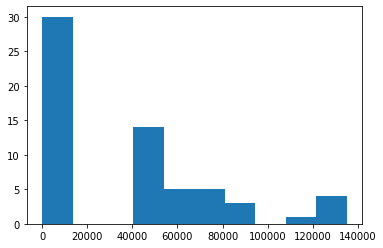

In [13]:
plt.hist(df['salary_average'])

In [14]:
df.location = df.location.str.split(',', n=1, expand=True)[0]

/Users/jamoth/anaconda3/envs/dsj/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df.groupby(by='location').agg({'salary_average' : ['count','mean','median','min','max']}).head(50)

salary_average                                        
                        count      mean    median       min       max
location                                                             
Chapel Hill                11   52714.0   51934.0   51934.0   53650.0
Cheyenne                    8    2675.5    2675.5    2675.5    2675.5
Chicago                     2   92500.0   92500.0   92500.0   92500.0
Cleveland                   1      24.0      24.0      24.0      24.0
Fort Worth                  3      17.5      17.5      17.5      17.5
Hill AFB                    1   59154.0   59154.0   59154.0   59154.0
Houston                     1    1506.5    1506.5    1506.5    1506.5
Huntingtown                 3   67500.0   67500.0   67500.0   67500.0
Jacksonville                2   47776.0   47776.0   47776.0   47776.0
John Day                    2    3333.5    3333.5    3333.5    3333.5
Los Angeles                 1   62860.0   62860.0   62860.0   62860.0
Madison                     1    1925.0    1925.0    1925.0    1925.0
New York                    1   82500.0   82500.0   82500.0   82500.0
Olympia                     1   70000.0   70000.0   70000.0   70000.0
Palo Alto                   1  117500.0  117500.0  117500.0  117500.0
Passaic                     1      19.5      19.5      19.5      19.5
Phoenix                     2      18.0      18.0      18.0      18.0
Pierre                      1    1065.0    1065.0    1065.0    1065.0
Portland                    3      23.5      23.5      23.5      23.5
Raleigh                     1      25.0      25.0      25.0      25.0
Salt Lake City              5  108282.0  135000.0    1410.0  135000.0
Santa Fe                    1   41809.5   41809.5   41809.5   41809.5
United States               4   72500.0   72500.0   72500.0   72500.0
Wisconsin                   5    1194.5    1961.5      44.0    1961.5

In [16]:
df

,company,job_title,salary,location,date,full_description,url,extraction_date,salary_low,salary_high,job_type,industry,education,career,salary_average
39,US Department of the Air Force,ENGINEERING DATA MANAGEMENT SPECIALIST,"$51,440 - $66,868 a year",Hill AFB,6 days ago,"['Duties\nSummary\nClick on """" button below to...",https://www.indeed.com/rc/clk?jk=7c84b70bcf217...,2019-11-05,51440,66868,Not available,Not available,Not available,Not available,59154.0
81,Piper Companies,Clinical Data Management Associate,$20 - $30 an hour,Raleigh,Just posted,['Piper Clinical Solutions is actively searchi...,https://www.indeed.com/rc/clk?jk=15a32ef618ad8...,2019-11-05,20,30,Not available,Not available,Not available,Not available,25.0
84,State of Wyoming,Statistician/Data Analyst,$23.38 - $30.13 an hour,Cheyenne,3 days ago,"[""Description and Functions\n\nOpen Until Fill...",https://www.indeed.com/rc/clk?jk=639e254619957...,2019-11-05,2338,3013,Not available,Not available,Not available,Not available,2675.5
107,GOLDEN WOLF LLC,Data Visualization Specialist,"$60,000 - $75,000 a year",Huntingtown,Today,"[""Description:\nThe Data Visualization Special...",https://www.indeed.com/rc/clk?jk=ae3796e793654...,2019-11-05,60000,75000,Not available,Not available,Not available,Not available,67500.0
132,GOLDEN WOLF LLC,Data Visualization Specialist,"$60,000 - $75,000 a year",Huntingtown,Today,"[""Description:\nThe Data Visualization Special...",https://www.indeed.com/rc/clk?jk=ae3796e793654...,2019-11-05,60000,75000,Not available,Not available,Not available,Not available,67500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Los Angeles Homeless Services Authority,Data Analyst (HMIS),"$51,314 - $74,406 a year",Los Angeles,12 days ago,['Under the supervision of the Data Systems Su...,https://www.indeed.com/rc/clk?jk=7e3752f4c541b...,2019-11-05,51314,74406,Not available,Not available,Not available,Not available,62860.0
849,MetroPlus Health Plan,Data Quality Analyst,"$80,000 - $85,000 a year",New York,Today,['Marketing Statement\nMetroPlus Health Plan p...,https://www.indeed.com/rc/clk?jk=ec1d734347046...,2019-11-05,80000,85000,Not available,Not available,Not available,Not available,82500.0
871,InspiHER Tech,"PYTHON/JAVA DATA ENGINEER, #10572","$85,000 - $100,000 a year",Chicago,Today,"['Published\nNovember 4, 2019\nLocation\nChica...",https://www.indeed.com/rc/clk?jk=d73050bf9a68e...,2019-11-05,85000,100000,Not available,Not available,Not available,Not available,92500.0
910,Jacaruso Enterprises,Business/Data Analyst,"$65,000 - $80,000 a year",United States,11 days ago,['Location: Remote (U.S.)\nSalary: $65K – 80K ...,https://www.indeed.com/rc/clk?jk=d8be93d9094a6...,2019-11-05,65000,80000,Not available,Not available,Not available,Not available,72500.0
